<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/Assignments-Due/Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Ans1**

Done!

**Task2**:

What is a decision tree? How do they work?

**Ans2**

A decision tree is a process that takes you from one decision to the next and tells you the results of taking that "path". This can be used for people to see infer what will happen when a decision is made, and it can also be used by computers to picup on trends in data by finding common ponts that are returned to

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

**Ans3**

The depth of a decision tree is how many layers or decisions the tree has on it before you reach the end of the tree. Depth determines the amount of specificity the tree can generate. When using a computer this is called the amout of overfitting the tree will generate. A trees appropriate depth for a certian application can be determined by analying the results of the tree in its current state and adjusting it to see if it leads to greater accuracy or not.

**Task4:**

How are BART models similar and different from a decision tree?

**Ans4**

BART models are similar to a decision tree because they use the same concept, of a decision tree with two distinctions.

1. They use tactics to help increase accuracy by combining results from multiple instances of the same decision tree

2. They reduce overfitting by enouraging the model to "replant" certan trees to create more diversity

**Task5**:

Why would we use a BART model instead of a decision tree?

**Ans5**

A BART model is going to be used over a decision tree because it helps gaurintee a more well-fitted model with less tinkering

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
import arviz as az
!pip install pymc-bart
!pip install preliz

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2.7 , 3.06, 3.42, 3.78, 4.14, 4.5 , 4.86, 5.22, 5.58, 5.94, 6.3 ]),
 <BarContainer object of 10 artists>)

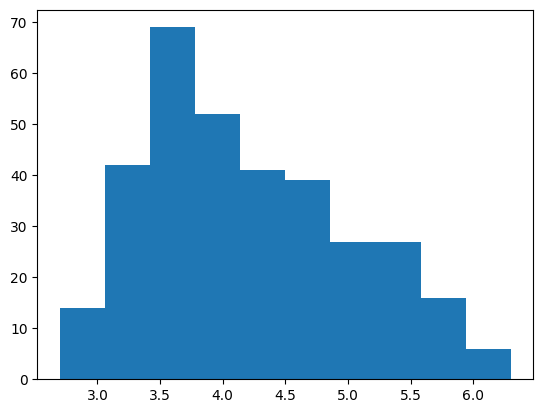

In [ ]:
plt.hist(penguins.body_mass)

In [23]:
#features = ["bill_length", "flipper_length", "bill_depth"]

#perdictor varible is the x
X = penguins[["bill_length", "flipper_length", "bill_depth"]].to_numpy()
#perdicted varible is the y
Y = penguins["body_mass"].to_numpy()

In [25]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

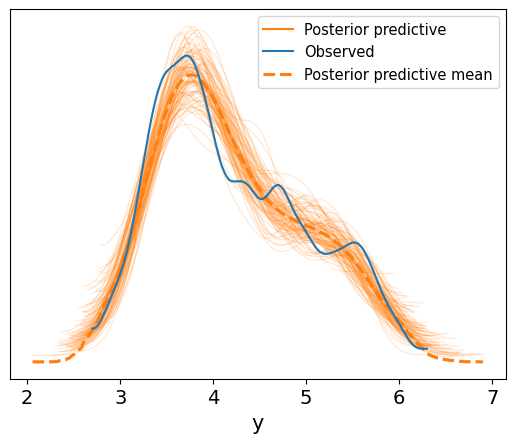

In [31]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguins, model_penguins, extend_inferencedata=True)
az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [ ]:
#we will take it! Not bad at all

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='body_mass', ylabel='flipper_length'>

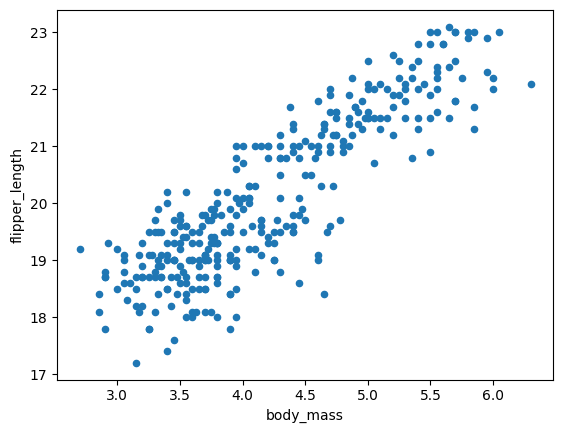

In [27]:
penguins.plot(y = 'flipper_length', x = 'body_mass', kind = "scatter")

In [29]:
posterior_mean = idata_penguins.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguins, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


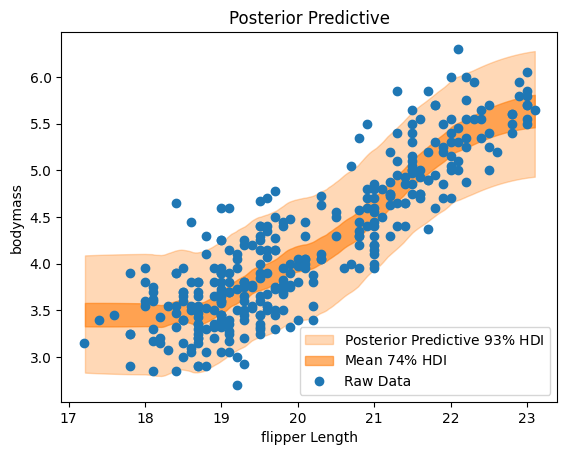

In [38]:
idx = np.argsort(X[:, 1])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X[:, 1],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X[:, 1],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper Length",
    ylabel="bodymass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

**ANS8**

I Think it does a pretty okay job of capturing the assocatin. Based on the narrowness of the 74% HDI it does a good job, but 74% is barely passing sooo idk. Comparing it to humans, arm length and body mass are correrlated because the taller you are the heavier you are, and your arms are usually in some range of proportion to your height, but if you get heavier at that height your arms dont get ANY longer. So, I would say that with the 93% HDI doing a pretty good job and the 74% HDI being MUCH narrower and given what I said about arm length in humans it does NOT capture the true assocation, but its not "unscientific".

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

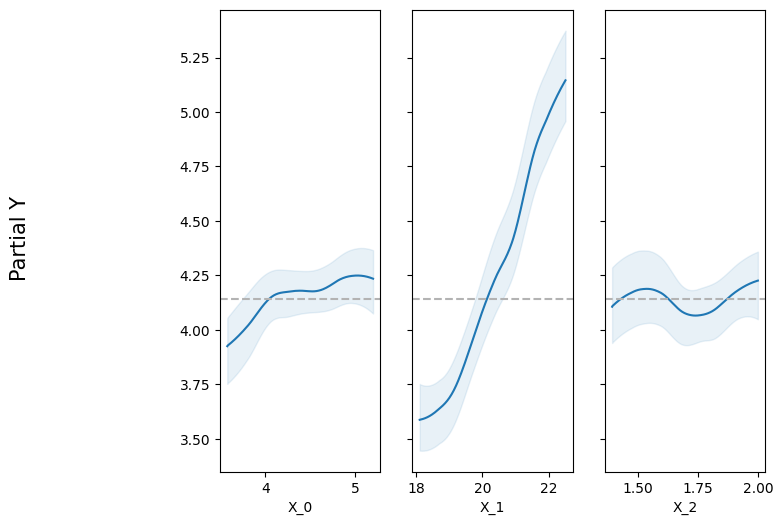

In [39]:
#first is the pdps plot
#I like how easy this was
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

X_0 is bill length

X_1 is flipper length

X_2 is flipper depth

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

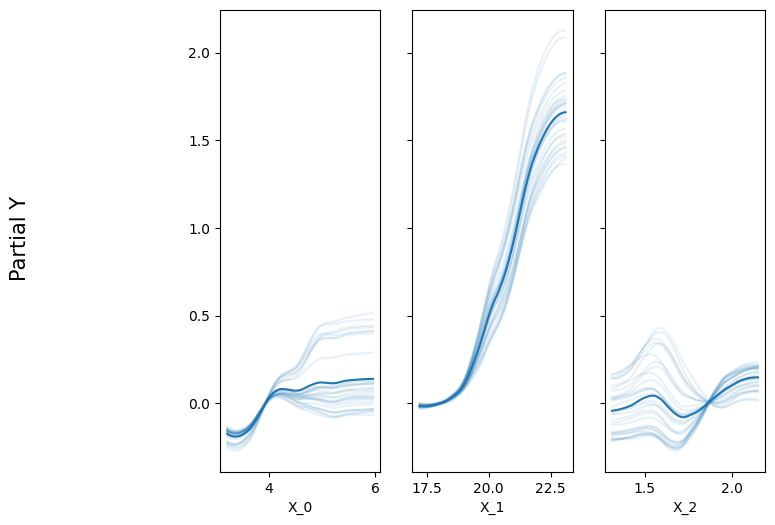

In [40]:
#next is Ice
#this took forever to run.lol
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [46]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)

<Axes: ylabel='R²'>

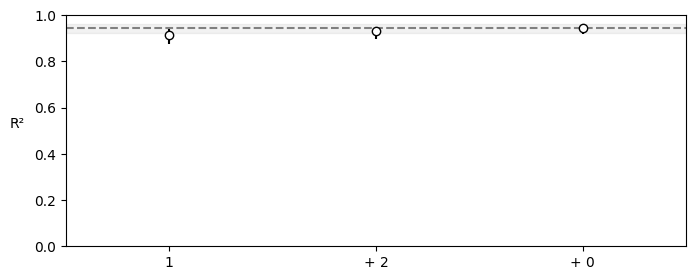

In [43]:
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

The data above consistentley shows that flipper length is by far the best perdictor of body of mass which isnt too suprising, but my guess would have been flipper depth because, like people, the "thicker" the pengyin is the "thicker" his flippers probably are. But i guess the data knows better.

The likely relationship for each varible to body massare as follows

Flipper length: Taller penguins = heaver penguins

Flipper Depth: fatter penguins = fatter flippers (or just thicker penguins...like a joe rogan penguin is short but thick.......)

Bill length: Bigger Penguins, longer bills? Idk...
I think that bill length could ge swapped for something else like sex or species because it is probably more consistent.

I would say that the relatonship between these varibles and body mass is 1000% complicated by other things because, well, with all adaptabile and geneticically different animals traits change over time and evolution creates statsical "inconsistencies"